# Task (a)
The Boston Dataset

In [1]:
library(MASS)
?Boston

**The Boston data frame has 506 rows and 14 columns.**

**Source:**

* Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

* Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

**This data frame contains the following columns:**

* crim: per capita crime rate by town.

* zn: proportion of residential land zoned for lots over 25,000 sq.ft.

* indus: proportion of non-retail business acres per town.

* chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

* nox: nitrogen oxides concentration (parts per 10 million).

* rm: average number of rooms per dwelling.

* age: proportion of owner-occupied units built prior to 1940.

* dis: weighted mean of distances to five Boston employment centres.

* rad: index of accessibility to radial highways.

* tax: full-value property-tax rate per $10,000.

* ptratio: pupil-teacher ratio by town.

* black: 1000(𝐵𝑘−0.63)2 where 𝐵𝑘 is the proportion of blacks by town.

* lstat: lower status of the population (percent).

* medv: median value of owner-occupied homes in $1000s.

In [2]:
Boston[['chas']] = as.factor(Boston[['chas']])
head(Boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


# Task (b)

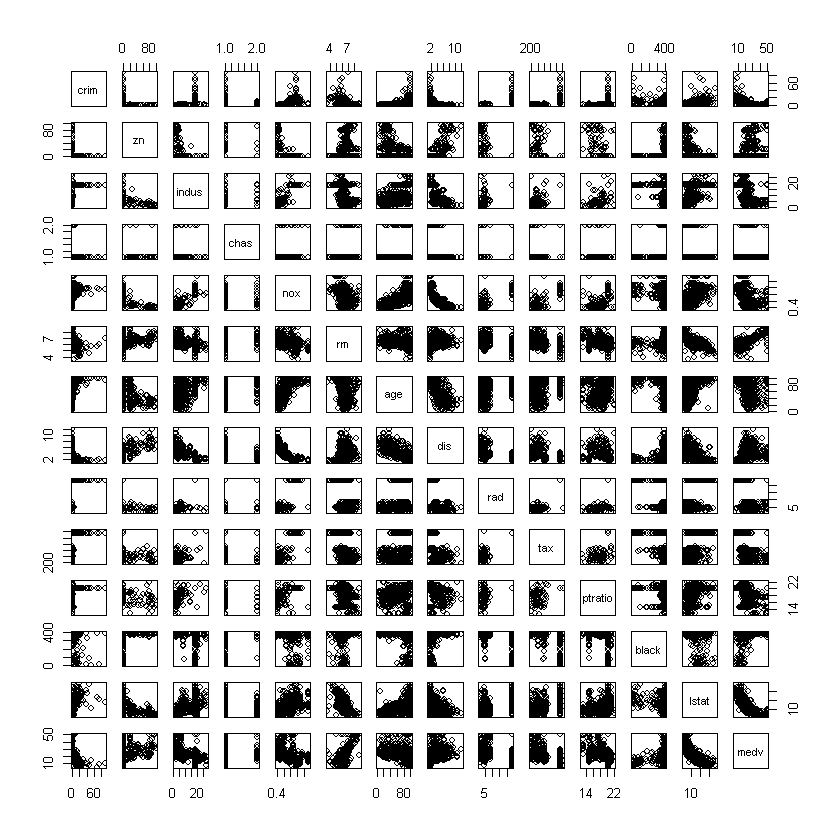

In [3]:
pairs(Boston)

**There is a strong correlation between most pairs of predictors.**

# Task (c)

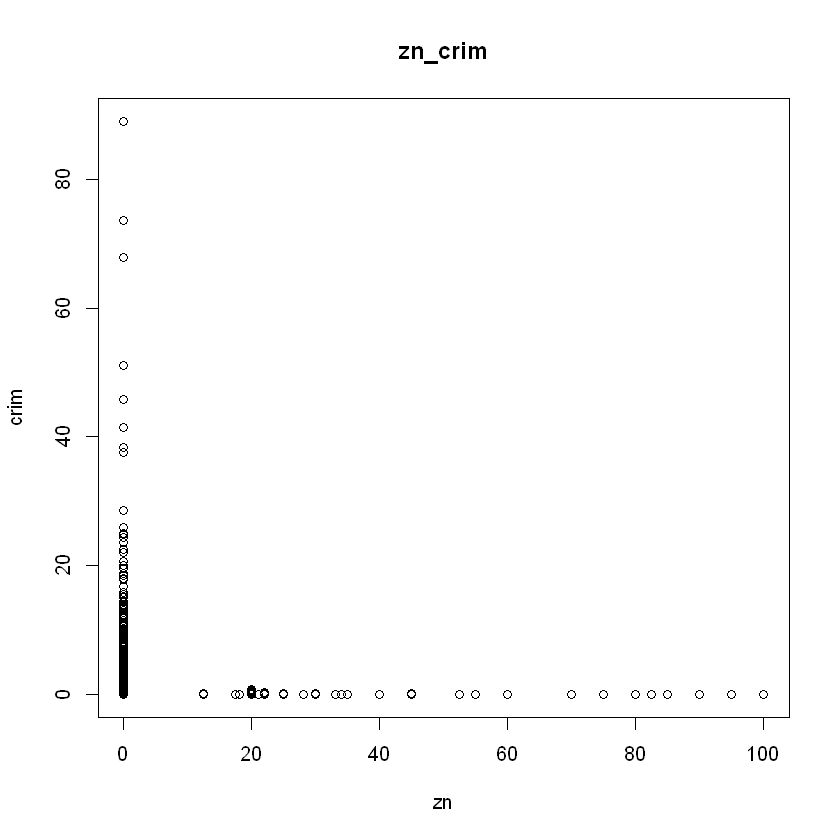

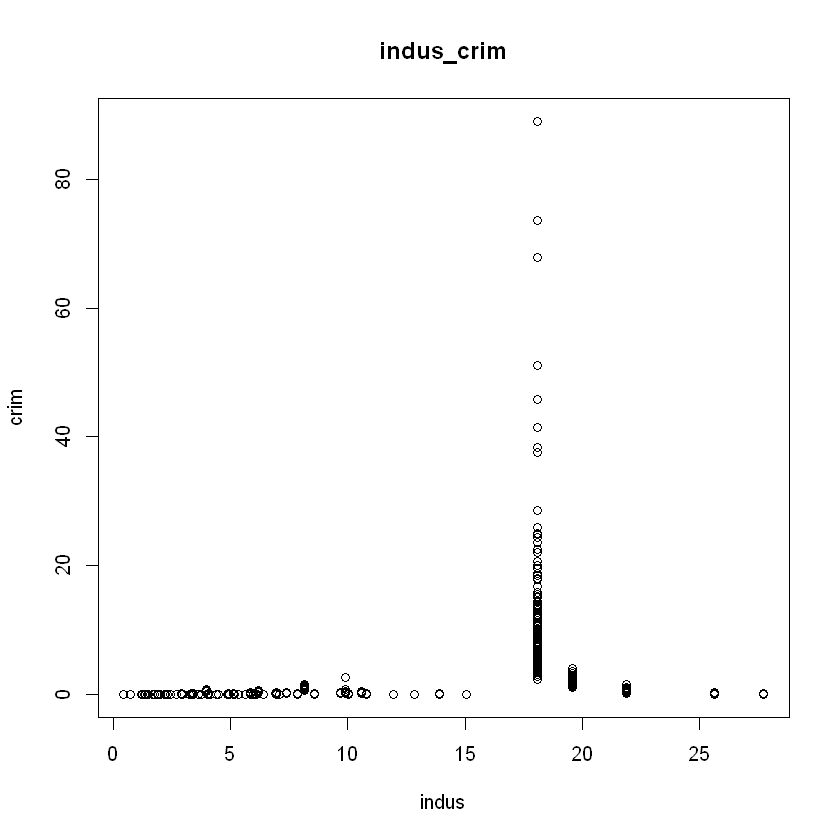

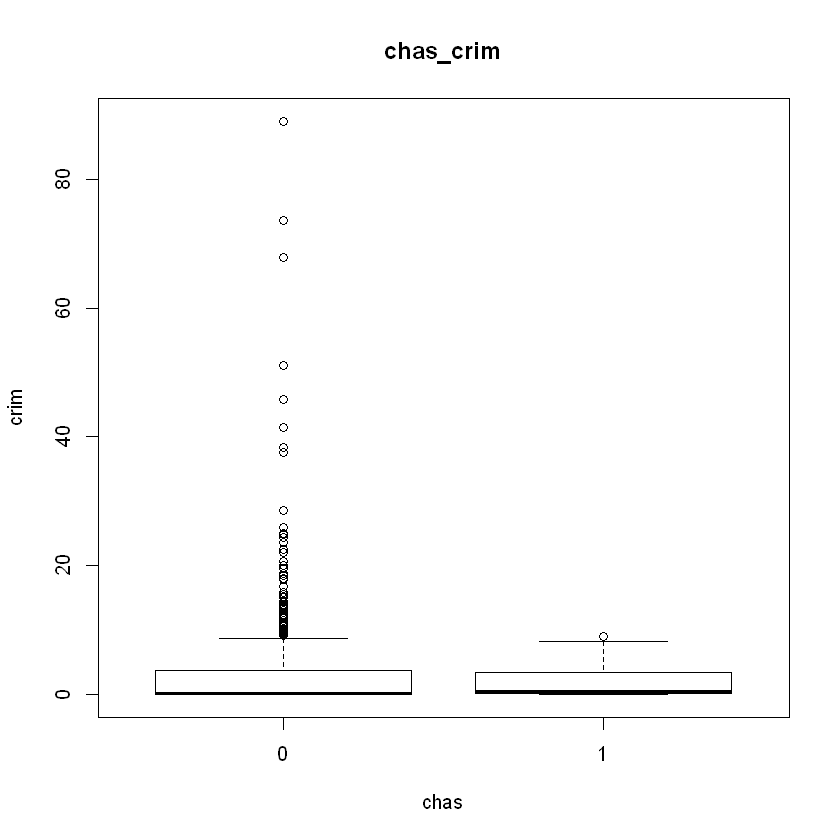

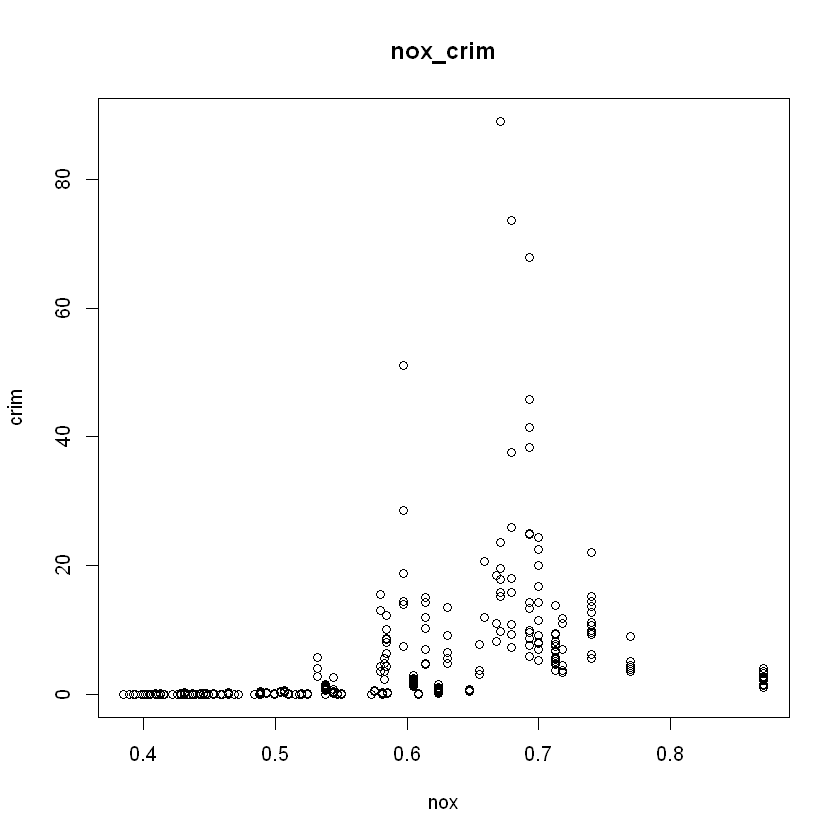

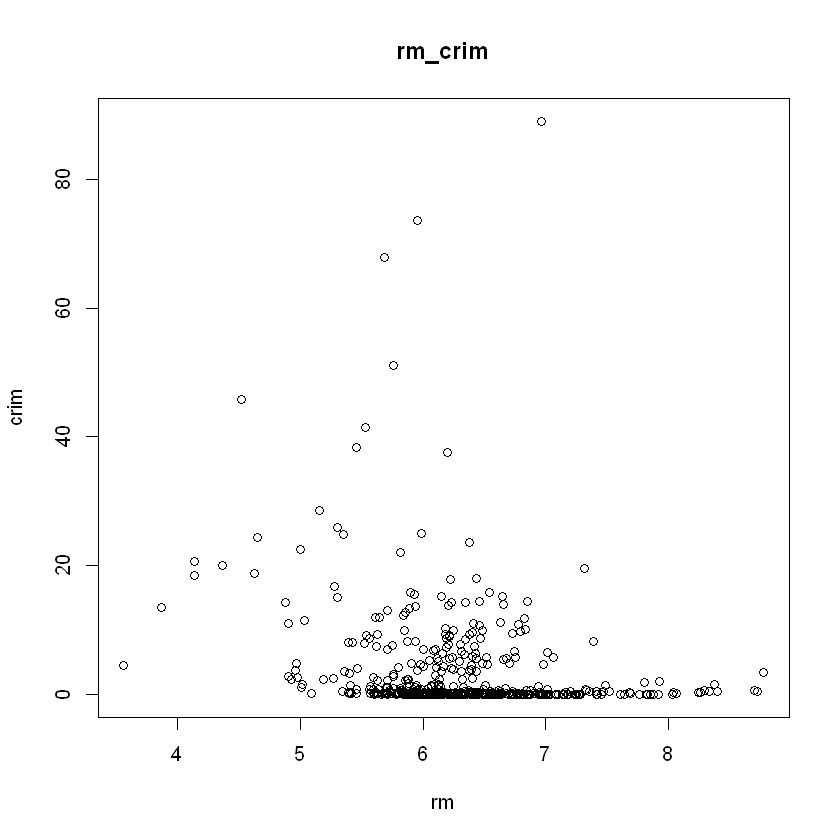

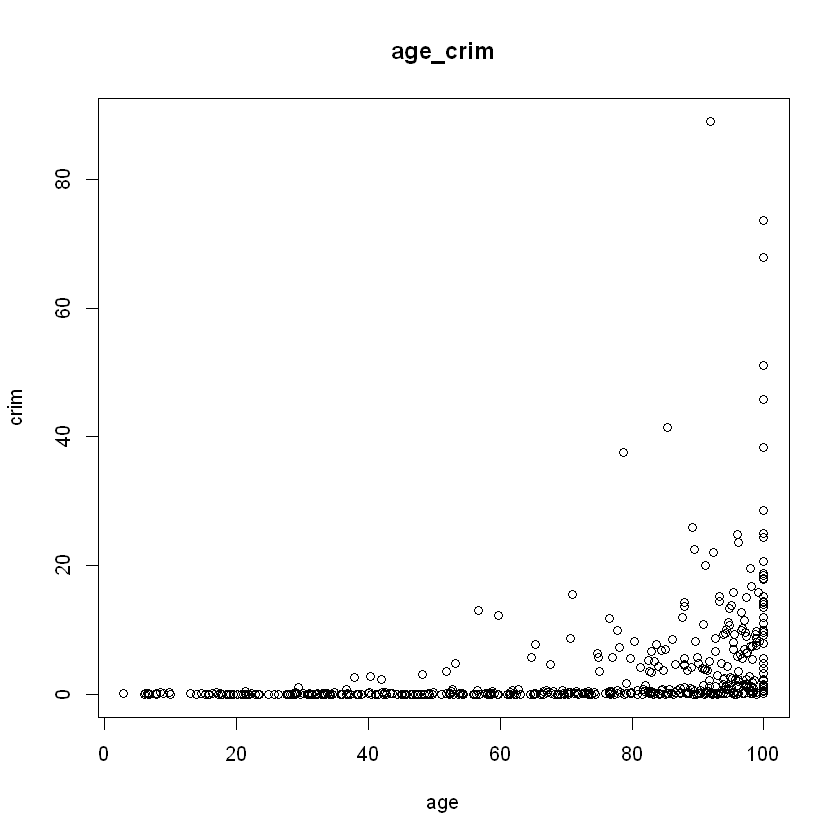

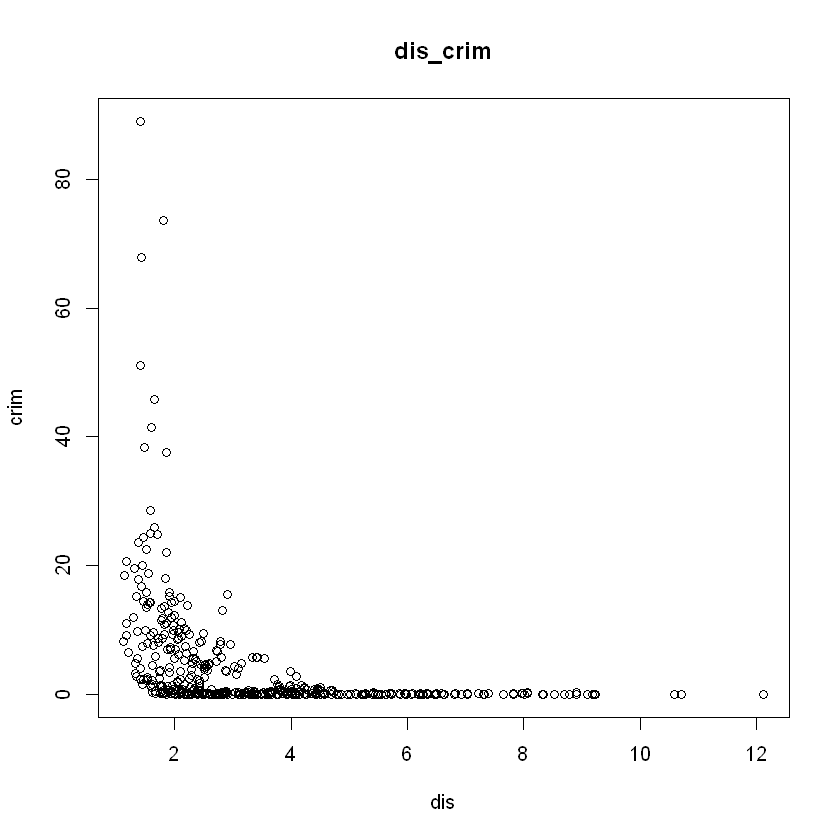

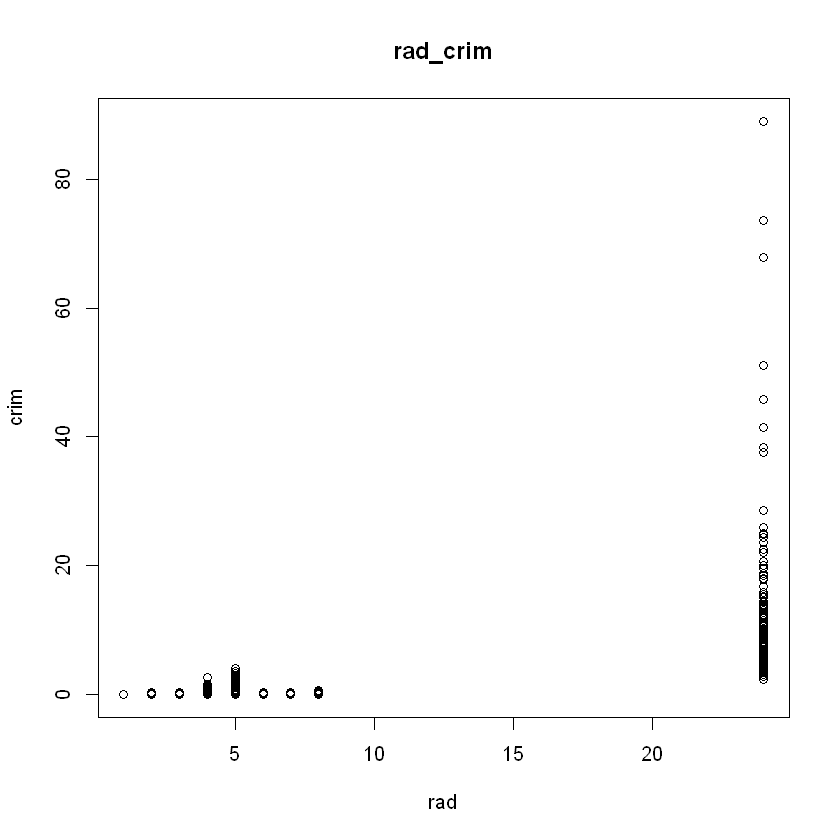

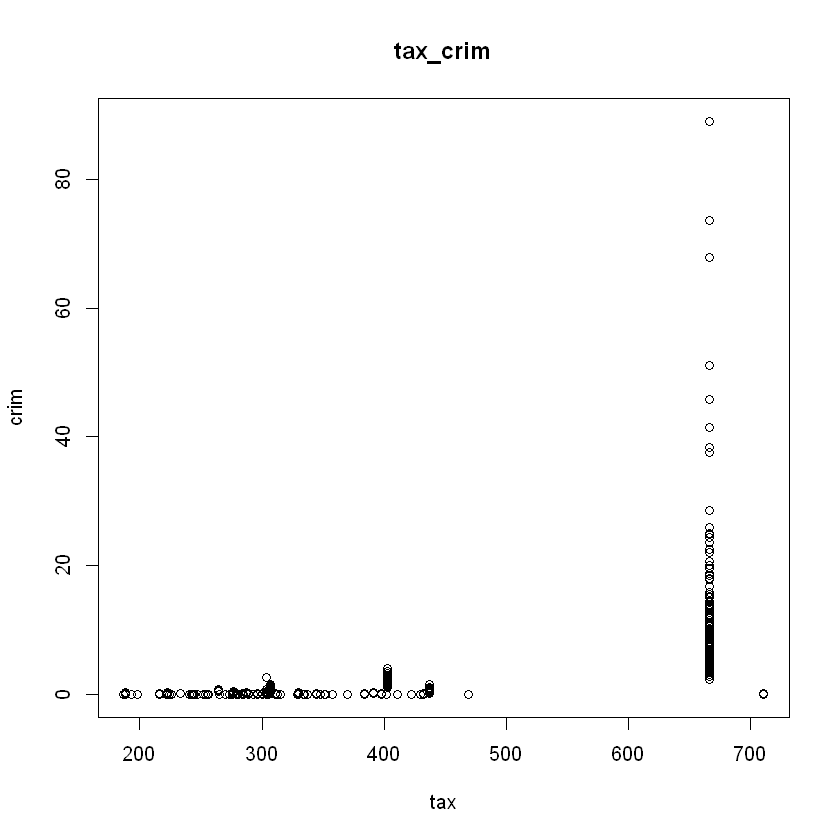

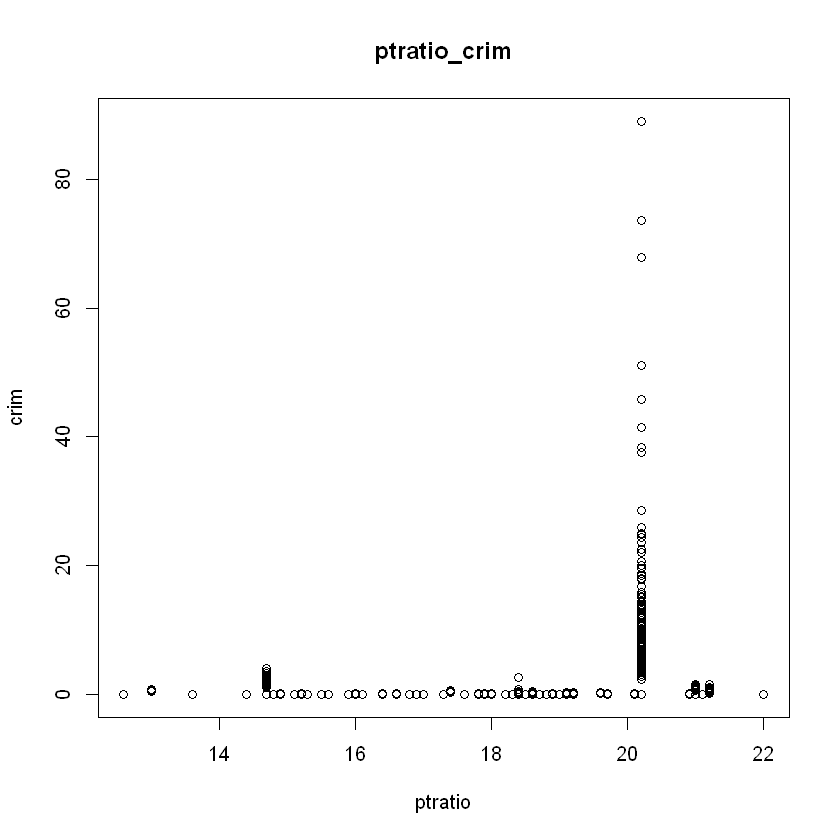

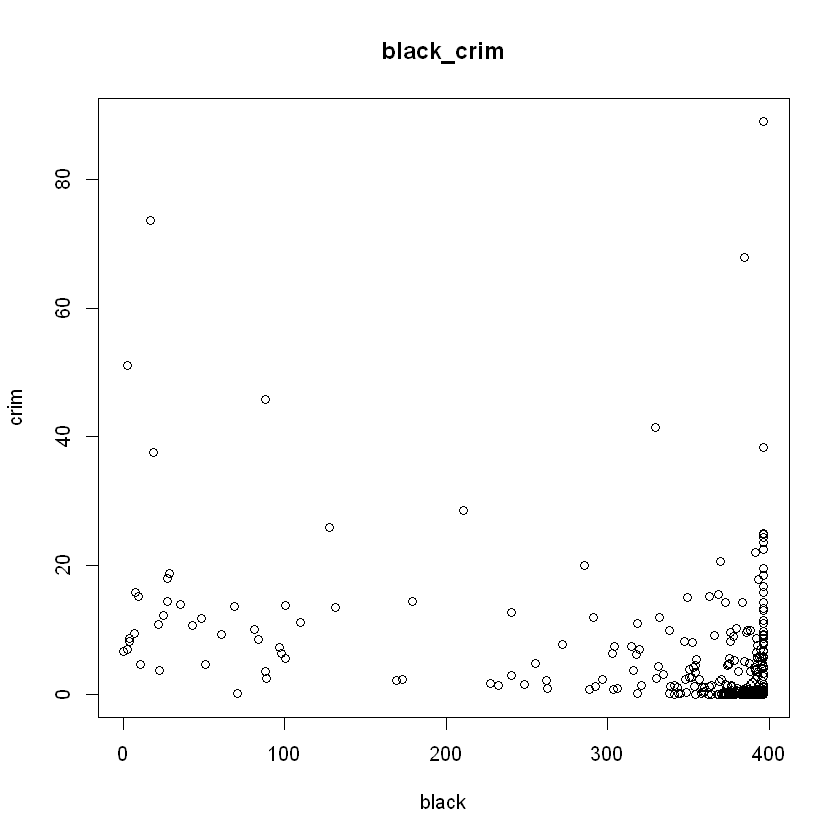

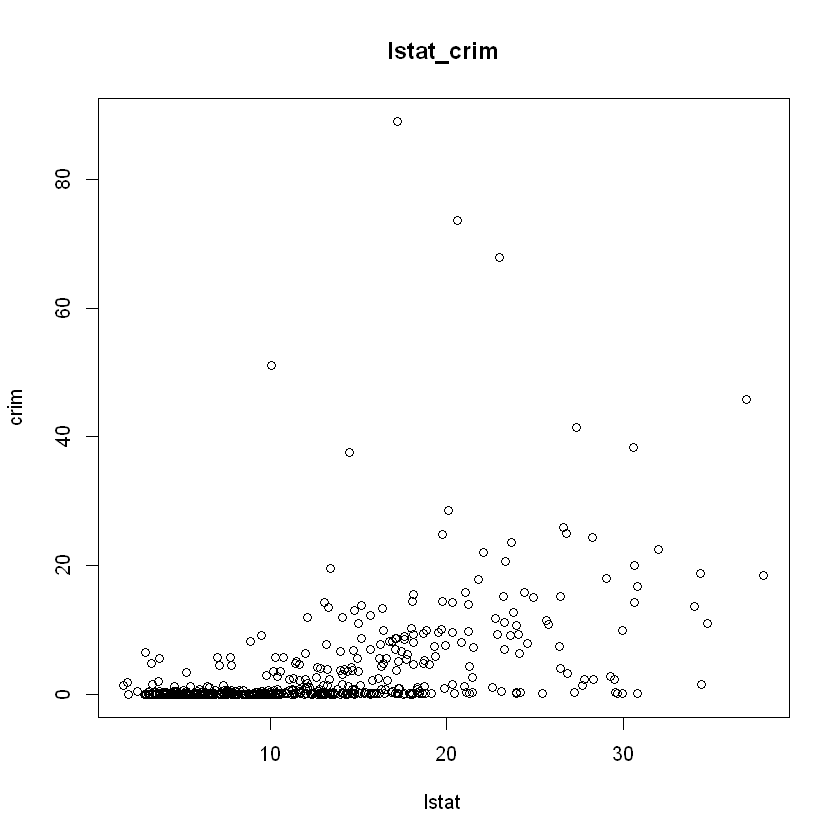

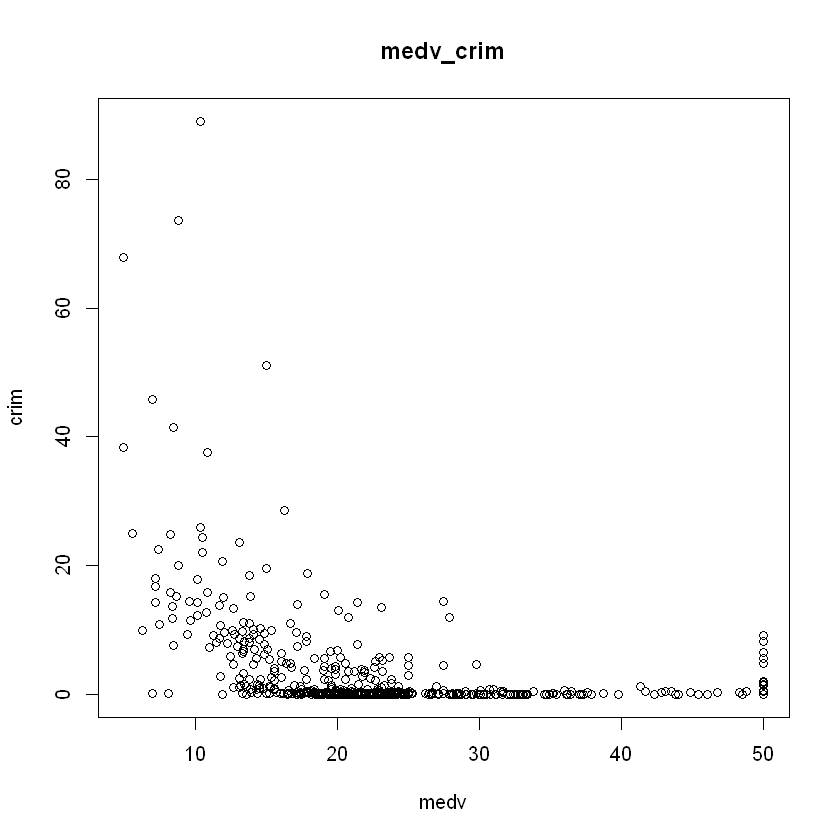

In [4]:
for (colname in colnames(Boston)){
    if (colname != 'crim') {
        plot(Boston[[colname]], Boston[['crim']], main=paste(colname, 'crim', sep='_'), xlab=colname, ylab='crim')
    }
}

**The "per capita crime rate by town" variable is strongly correlated with every other variables.**

# Task (d)

* Does any of the suburbs of Boston appear to have particularly high crime rates, Tax rates, Pupil-teacher ratios?
* Comment on the range of each predictor.

In [5]:
observed_vars = c('crim', 'tax', 'ptratio')
observed_ranges = t(sapply(Boston[observed_vars], range))
colnames(observed_ranges) = c('min', 'max')
observed_ranges

,min,max
crim,6.32e-03,88.9762
tax,1.87e+02,711.0000
ptratio,1.26e+01,22.0000


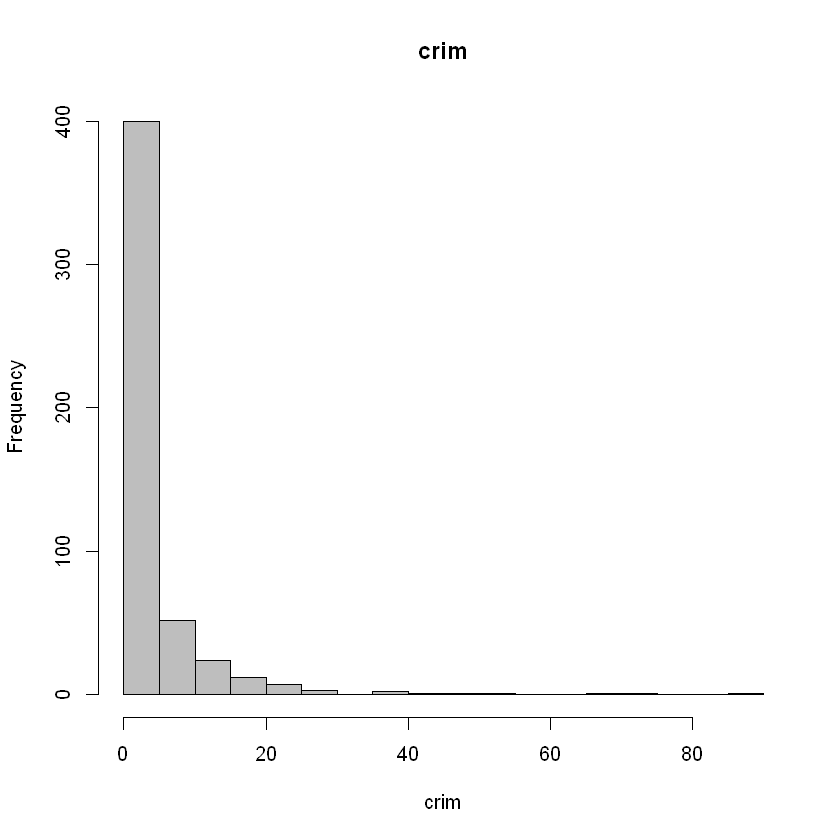

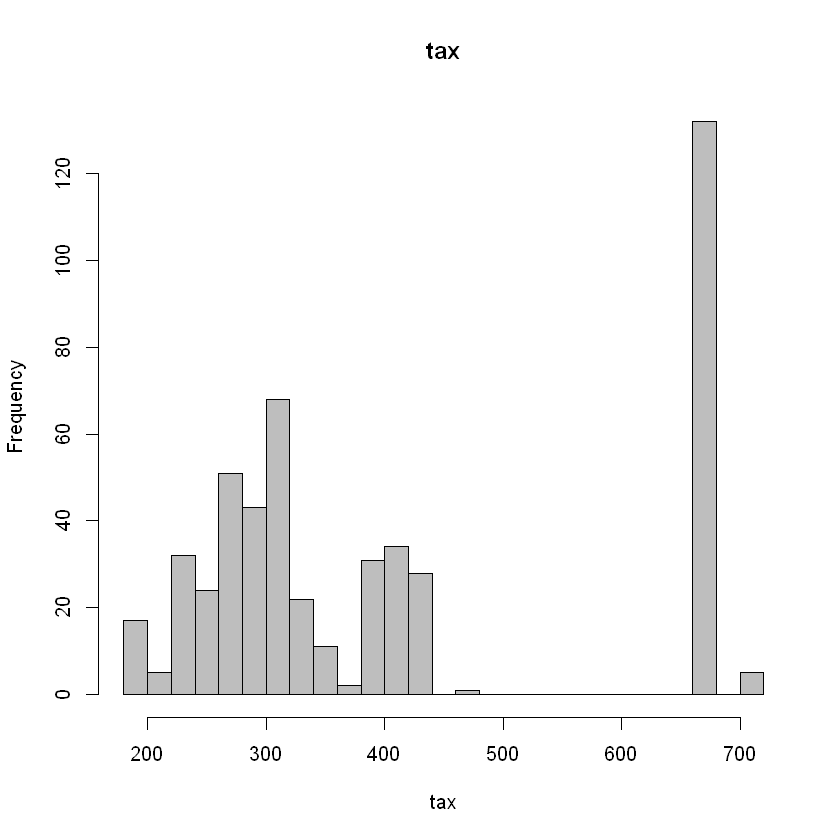

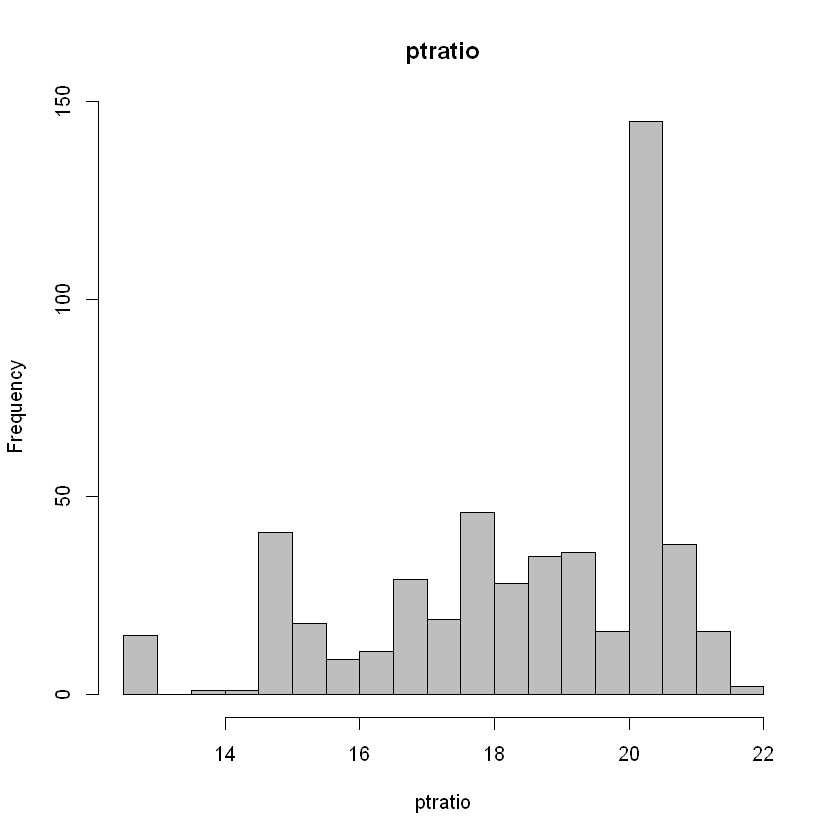

In [6]:
for (column in observed_vars) {
    hist(Boston[[column]], main=column, xlab=column, col='gray', breaks=20)
}

* crime rate: some area has a very high crime rate (up to 80), as the range of crime rate is very high compares to its distribution.
* tax rate: a large portion of areas has a particularly high tax rate (over 600) compares to the rest, as tax rate is unevenly distributed along its range.
* pupil-teacher ratio: a large portion of areas has a particularly high pupil-teacher ratio(over 20) compares to the rest, as the ratio is not so evenly distributed along its range in general.

# Task (e)
Number of areas which bound the Charles river

In [7]:
length(Boston[Boston['chas']==1])

[1] 490

# Task (f)
Median of pupil-teacher ratio

In [8]:
median(Boston[['ptratio']])

[1] 19.05

# Task (g)
* Which suburb of Boston has lowest median value of owner-occupied homes?
* What are the values of the other predictors for that suburb?
* How do those values compare to the overall ranges for those predictors? Comment on your findings.

In [9]:
Boston[Boston['medv'] == min(Boston[['medv']]),]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
399,38.3518,0,18.1,0,0.693,5.453,100,1.4896,24,666,20.2,396.90,30.59,5
406,67.9208,0,18.1,0,0.693,5.683,100,1.4254,24,666,20.2,384.97,22.98,5


In [10]:
all_ranges = t(sapply(Boston[colnames(Boston)[sapply(Boston, is.numeric)]], range))
colnames(all_ranges) = c('min', 'max')
all_ranges

,min,max
crim,0.00632,88.9762
zn,0.00000,100.0000
indus,0.46000,27.7400
nox,0.38500,0.8710
rm,3.56100,8.7800
age,2.90000,100.0000
dis,1.12960,12.1265
rad,1.00000,24.0000
tax,187.00000,711.0000
ptratio,12.60000,22.0000


**Those values compare to the overall ranges:**
* crim: relatively high
* zn: extremely low (min)
* indus: relatively low
* nox: relatively high
* rm: average
* age: extremely high (max)
* dis: extremely low
* rad: extremely high (max)
* tax: extremely high
* ptratio: very high
* black: extremely high (max)
* lstat: relatively high

# Task (h)

* How many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling?
* Comment on the suburbs that average more than eight rooms per dwelling.

In [11]:
length(Boston[Boston['rm'] > 7])

[1] 896

In [12]:
length(Boston[Boston['rm'] > 8])

[1] 182

In [13]:
summary(Boston[Boston['rm'] > 8, ])

      crim               zn            indus        chas        nox        
 Min.   :0.02009   Min.   : 0.00   Min.   : 2.680   0:11   Min.   :0.4161  
 1st Qu.:0.33147   1st Qu.: 0.00   1st Qu.: 3.970   1: 2   1st Qu.:0.5040  
 Median :0.52014   Median : 0.00   Median : 6.200          Median :0.5070  
 Mean   :0.71879   Mean   :13.62   Mean   : 7.078          Mean   :0.5392  
 3rd Qu.:0.57834   3rd Qu.:20.00   3rd Qu.: 6.200          3rd Qu.:0.6050  
 Max.   :3.47428   Max.   :95.00   Max.   :19.580          Max.   :0.7180  
       rm             age             dis             rad        
 Min.   :8.034   Min.   : 8.40   Min.   :1.801   Min.   : 2.000  
 1st Qu.:8.247   1st Qu.:70.40   1st Qu.:2.288   1st Qu.: 5.000  
 Median :8.297   Median :78.30   Median :2.894   Median : 7.000  
 Mean   :8.349   Mean   :71.54   Mean   :3.430   Mean   : 7.462  
 3rd Qu.:8.398   3rd Qu.:86.50   3rd Qu.:3.652   3rd Qu.: 8.000  
 Max.   :8.780   Max.   :93.90   Max.   :8.907   Max.   :24.000  
      

**Those values compare to the overall ranges:**
* crim: extremely low
* zn: variety
* indus: variety
* nox: variety
* age: relatively high
* dis: relatively low
* rad: relatively low
* tax: variety
* ptratio: very high
* black: extremely high
* lstat: relatively low
* medv: relatively high